Introduction

In [215]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\tsblo\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['polyfit']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Q1 - Read in data

In [216]:
df_gold = pd.read_csv('Gold (1).txt', sep = "\t", header = None, names = ["url", "category"])
df_labels = pd.read_csv("labels (1).txt", sep = "\t", header = None, names = ["turk", "url", "category"])
print df_gold.columns.values
print df_labels.columns.values

['url' 'category']
['turk' 'url' 'category']


# Q2 - Split into two DataFrames

In [255]:
labels_in_gold = df_gold.merge(df_labels, left_on = "url", right_on = "url", suffixes = ["_gold", "_labels"])
print labels_in_gold.shape

labels_not_gold = df_labels[~df_labels["url"].isin(df_gold["url"])]
print labels_not_gold.shape

(3324, 4)
(89397, 3)


# Q3 - Compute accuracies of turks

In [258]:
labels_in_gold["correct_rating"] = labels_in_gold["category_gold"] == labels_in_gold["category_labels"]
labels_in_gold[:10]

labels_in_gold["correct_rating"] = labels_in_gold["correct_rating"].replace([False, True], [0, 1])
labels_in_gold[:10]

def ratio(s):
    return  s.sum() * 1.0 / s.count()

rater_goodness = labels_in_gold.groupby("turk")["correct_rating"].agg(["count","sum",ratio])
rater_goodness.sort_values(by = "count", ascending = False)[:20]

,count,sum,ratio
turk,,,
A31OCN4MNHUQ6W,184,143,0.777174
A153PKAL7OAY36,148,107,0.722973
A2BTR0GQ5B5JI6,126,66,0.523810
ATVALOQVDCMZW,103,88,0.854369
AZSDW7JJL5VA7,100,68,0.680000
A3GE97GX3OXJTW,85,56,0.658824
A3JMQDTEKRE5X6,80,54,0.675000
A2JP3HEL3J25AJ,80,55,0.687500
A3MA9V9UPGCOK7,71,55,0.774648


# Q4 - Odds ratios

In [259]:
def odds(s):
    return  (s.sum() * 1.0 / s.count()) / (1.001 - (s.sum() * 1.0 / s.count()))

rater_odds = labels_in_gold.groupby("turk")["correct_rating"].agg(["count","sum",ratio, odds])
rater_odds.sort_values(by = "count", ascending = False)[:20]

,count,sum,ratio,odds
turk,,,,
A31OCN4MNHUQ6W,184,143,0.777174,3.472222
A153PKAL7OAY36,148,107,0.722973,2.600369
A2BTR0GQ5B5JI6,126,66,0.523810,1.097695
ATVALOQVDCMZW,103,88,0.854369,5.826657
AZSDW7JJL5VA7,100,68,0.680000,2.118380
A3GE97GX3OXJTW,85,56,0.658824,1.925391
A3JMQDTEKRE5X6,80,54,0.675000,2.070552
A2JP3HEL3J25AJ,80,55,0.687500,2.192982
A3MA9V9UPGCOK7,71,55,0.774648,3.422313


# Q5 - Most accurate turks 

In [220]:
rater_odds = labels_in_gold.groupby("turk")["correct_rating"].agg(["count","sum",ratio, odds])
rater_odds[rater_odds["count"] >= 20].sort_values(by = "ratio", ascending = False)[:10]

,count,sum,ratio,odds
turk,,,,
A2U0R4X38GUKZE,20,19,0.950000,18.627451
A22C0PJUBFJTI0,36,33,0.916667,10.869565
A23YQUBXZPKILZ,24,21,0.875000,6.944444
ATVALOQVDCMZW,103,88,0.854369,5.826657
A1HIXWH4OXT8S4,40,33,0.825000,4.687500
A3220HG1O83HQ4,22,18,0.818182,4.475385
A32W20KGQXS0LL,25,20,0.800000,3.980100
A20PWAB7G3HDHU,20,16,0.800000,3.980100
AJSJVK40F5HM6,28,22,0.785714,3.649635


# Q6 -  Rating counts versus accuracy

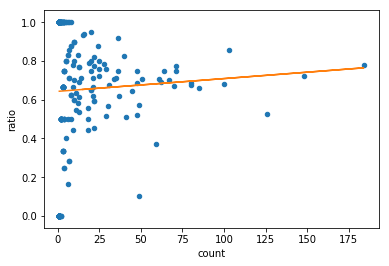

In [87]:
rater_odds.plot.scatter(x = "count", y = "ratio")

import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Sample data
x = rater_odds['count']
y = rater_odds['ratio']

# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

# Q7 - Overall predicted odds

In [279]:
turks_ratings = rater_odds[rater_odds["count"] >= 1]
#print len(turks_ratings)*.25
turks_ratings = turks_ratings.sort_values(by = "count", ascending = False)[:67]
turks_ratings.reset_index(level = 0, inplace = True)
labels_unkown_turks_odds = turks_ratings.merge(labels_not_gold, left_on = "turk", right_on = "turk")
#print labels_unkown_turks_odds[:10]
overall_odds = labels_unkown_turks_odds.groupby(["url", "category"])[["odds"]].prod()
overall_odds = overall_odds.unstack()["odds"].fillna(0)
overall_odds[:20]

category,G,P,R,X
url,,,,
http://0-101.net,2.155963,0.000000,0.000000,0.000000
http://000.cc,1.460583,0.000000,0.000000,0.000000
http://0000.jp,14.488244,0.000000,0.000000,0.000000
http://000relationships.com,5.681060,1.851852,0.000000,0.000000
http://000vitamins.com,3.784982,0.000000,0.000000,0.000000
http://000webhost.com,11.159502,0.000000,0.000000,0.000000
http://003my.com,4.912040,0.000000,0.000000,0.000000
http://007absolutehardcore.com/early_cumshots/index.html,0.000000,3.346522,12.290450,293.252871
http://007swz.cn,1.393883,0.000000,0.000000,0.000000


# Q8 - Predicted categories

In [281]:
results_75 = pd.DataFrame(overall_odds.T.idxmax(), columns = ["top category"])
results_75["top odds"] = overall_odds.T.agg("max")
results_75[:10]

,top category,top odds
url,,
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,5.681060
http://000vitamins.com,G,3.784982
http://000webhost.com,G,11.159502
http://003my.com,G,4.912040
http://007absolutehardcore.com/early_cumshots/index.html,X,293.252871
http://007swz.cn,G,1.393883


# Q9 - Predicted categories using more turks

In [245]:
turks_ratings = rater_odds[rater_odds["count"] >= 1]
#print len(turks_ratings)*.75
turks_ratings = turks_ratings.sort_values(by = "count", ascending = False)[:201]
turks_ratings.reset_index(level = 0, inplace = True)
labels_unkown_turks_odds = turks_ratings.merge(labels_not_gold, left_on = "turk", right_on = "turk")
overall_odds = labels_unkown_turks_odds.groupby(["url", "category"])[["odds"]].prod()
overall_odds = overall_odds.unstack()["odds"].fillna(0)

results_25 = pd.DataFrame(overall_odds.T.idxmax(), columns = ["top category"])
#results_25["top odds"] = overall_odds.T.agg("max")
results_25["top odds"] = overall_odds.T.max()
results_25[:10]
#print results_75

,top category,top odds
url,,
http://0-101.net,G,2.155963e+00
http://000.cc,G,2.181050e+03
http://0000.jp,G,2.877556e+07
http://000relationships.com,P,1.851852e+00
http://000vitamins.com,G,5.014149e+00
http://000webhost.com,G,1.113723e+07
http://003my.com,G,4.912040e+00
http://007absolutehardcore.com/early_cumshots/index.html,X,5.847515e+02
http://007swz.cn,G,1.391101e+00


In [284]:
results_25_75 = results_75.merge(results_25, left_on = "url", right_on = "url", suffixes = ["_75", "_25"])
results_25_75[:10]

,top category_75,top odds_75,top category_25,top odds_25
url,,,,
http://0-101.net,G,2.155963,G,2.155963e+00
http://000.cc,G,1.460583,G,2.181050e+03
http://0000.jp,G,14.488244,G,2.877556e+07
http://000relationships.com,G,5.681060,P,1.851852e+00
http://000vitamins.com,G,3.784982,G,5.014149e+00
http://000webhost.com,G,11.159502,G,1.113723e+07
http://003my.com,G,4.912040,G,4.912040e+00
http://007absolutehardcore.com/early_cumshots/index.html,X,293.252871,X,5.847515e+02
http://007swz.cn,G,1.393883,G,1.391101e+00


In [286]:
table = pd.crosstab(results_25_75["top category_75"], results_25_75["top category_25"])
table

top category_25,G,P,R,X
top category_75,,,,
G,8167,695,208,233
P,217,296,51,19
R,24,36,123,25
X,43,6,30,437
